<a href="https://colab.research.google.com/github/NBTailee/GLD_prediction/blob/main/goldprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
gld_dt = pd.read_csv("gld_price_data.csv")

In [ ]:
gld_dt.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gld_dt.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# check the size of dataset
gld_dt.shape

(2290, 6)

In [ ]:
# check some basic information
gld_dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gld_dt.isnull().sum()
# no missing value

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# caculate some statistical measures
gld_dt.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
# find correlation between column

1. Positive correlation

In [ ]:
gld_corr = gld_dt.corr()

<ipython-input-22-0cdbea16bce1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  gld_corr = gld_dt.corr()


In [ ]:
print(gld_corr)

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

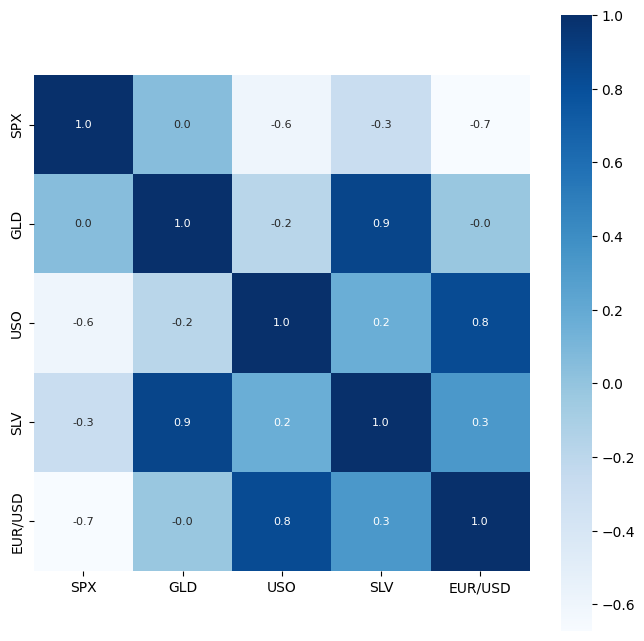

In [ ]:
# heatmap to understand the pos_corr
plt.figure(figsize = (8,8))
sns.heatmap(data = gld_corr, cbar = True, square = True, fmt = ".1f" ,annot = True, annot_kws = {"size":8}, cmap="Blues")

##### we can see that GLD and SLV have a high positive correlation that why as the price of the gold increases, the silver price also increase.

In [ ]:
print(gld_corr["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

<ipython-input-39-17b69df55b41>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gld_dt["GLD"], color = "green")


<Axes: xlabel='GLD', ylabel='Density'>

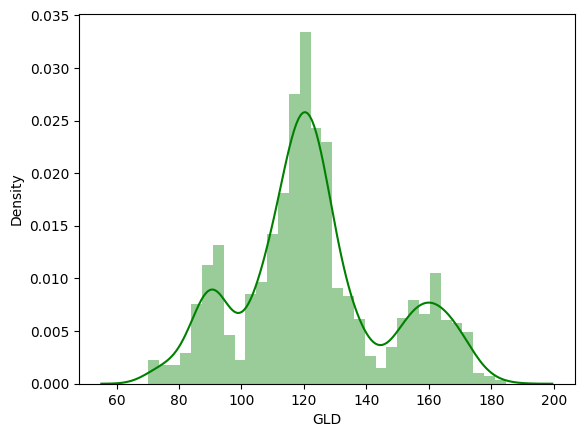

In [ ]:
sns.distplot(gld_dt["GLD"], color = "green")

In [ ]:
# split features
X = gld_dt.drop(["Date","GLD"], axis=1)
y = gld_dt["GLD"]
# date is useless so i decided to remove

In [ ]:
print(X)

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [ ]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [ ]:
#  Machine learning processing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2201)

In [ ]:
# train model
reg = RandomForestRegressor(n_estimators = 100)

In [ ]:
reg.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# predict so later i can have estimated results to compare with the real results
# to see if my ML work well
y_pred = reg.predict(X_test)

In [ ]:
print(y_pred)

array([132.06710234,  86.29149911, 107.40949975, 129.13889877,
       124.80079975, 123.60049949, 170.39510004, 125.63430131,
       121.49259929, 121.38969989,  88.681     , 150.47700146,
       100.78390052, 111.92480049, 107.02089829, 165.32579923,
        87.13109818, 161.42410465, 102.01929978,  84.34859995,
        86.21929843, 141.07069768, 122.46849975, 128.0210005 ,
       116.46870109,  98.60260008, 121.18539953, 119.71370154,
        97.95559745, 135.26219843, 121.74029897,  92.24549951,
       135.160799  , 160.65840271, 123.00730037, 103.57579795,
       103.1734    , 154.20039983, 130.96679749, 108.84929894,
       121.24519925, 160.27820192, 118.3834005 , 119.96230077,
       133.68529965, 116.79159991, 167.03219892,  82.93800105,
        83.32399917, 125.33710055, 108.32989982, 119.45140118,
       118.73229799, 117.51039967,  84.62229923, 122.2445992 ,
       120.54510128, 156.47079856, 118.66060122,  92.38660005,
       108.29239882, 160.01709905, 113.4600004 , 125.63

In [ ]:
# R squared error
err_score = metrics.r2_score(y_test, y_pred)
print("R squared error : ", err_score)

R squared error :  0.9891497978558149


In [ ]:
# compare acutal value and predicted value in plot
y_test = list(y_test)

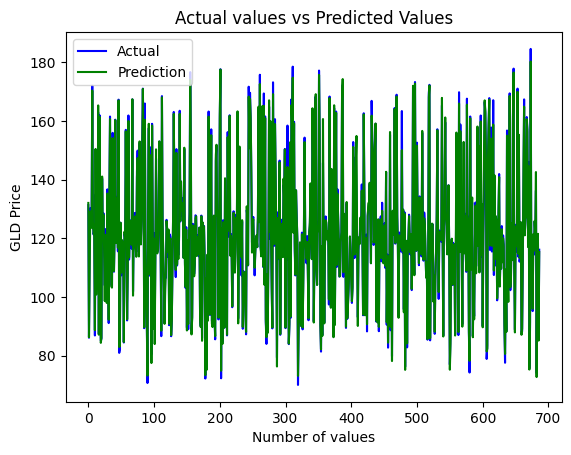

In [ ]:
plt.plot(y_test, color="blue", label = "Actual")
plt.plot(y_pred, color="green", label = "Prediction")
plt.title("Actual values vs Predicted Values")
plt.xlabel("Number of values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()

we can see the ML model have done pretty well in predicting price through the plot above